In [ ]:
#import required libraries
#Load data
#Divide it into training and testing
#Further divide training to training and validation
#Change in dimension
#Normalization
#Built the CNN Model
#Train model
#Test and evaluate model
#Report
#Save model
#Modified National Institute of Standards and Technology database.

#Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples 
#and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

#CNN:Used for image recognition
#CNN: When we give an image as input,it will divide this image into many sub images using matrix this is called convolutional stack
#by multiplying matrix with single filter after which we get a filter image which is called as feature map
#So just like this we use different filters we can create many images
#But since we have many images,size is too large so we need to compress
#hence we use pooling to compress
#this process is also called sub sampling
#0:black and 255 means white
#we normalize image by 255 so the numbers will be small and the computation becomes easier and faster.

import numpy as np
import matplotlib.pyplot as plt #show images
import seaborn as sns #show images
import tensorflow as tf #keras is high level api of tf
import keras #build cNN
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#divide dataset into 4 parts
X_train.shape,y_train.shape, X_test.shape,y_test.shape 
#height:28 pixel, width:28pixel, 60000:no of images , we hv stored labels in y_train so we hv 60000 labels
#x_train is a 3-D matrix which has many matrices of numbers in it
#where each matrix represents an image


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
class_labels = [	"T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",	"Sneaker",	"Bag",	"Ankle boot"]
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
X_train = np.expand_dims(X_train,-1)#expanded dimensions from 3 to 4 .If we dont do it,we will get errors

In [ ]:
X_test=np.expand_dims(X_test,-1)#expanded dimensions from 3 to 4 .If we dont do it,we will get errors

In [ ]:
X_train = X_train/255 #normalization so that all values r in range from 0 to 1
X_test= X_test/255 #Feature scaling

In [ ]:
from sklearn.model_selection import  train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020) 
#divided the training images of 60000 into 48000 training and 12000 images for validation
#validation is done along with training means while training we r testing
#where as testing dataset is used to test after building CNN 
#0.2 means 20% data required for validation
#The random state hyperparameter is used to control the randomness involved in machine learning models

In [ ]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape 

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [ ]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         #2D coz we hv 2D images
                         #3 layers: Convolutional,Pooling,Fully connected
                         #ReLU, which stands for Rectified Linear Unit, is an activation function commonly used in deep learning neural networks.
                         #no of filters=32 means one image is converted in multiple diff images
                         #kernel size=3
                         #Filters represent the number of output channels after convolution has been performed
                         #Kernel represents the size of a convolution filter being used to perform convolution on the image
                         #strides:no of pixel shifts 
                         #Padding is a process of adding zeros to the input matrix symmetrically.
                         #input shape=28 rows and 28 columns
                         #1 channel no means black and white
                         #if it was 3 it means coloured image
                         #creating an array of 2x2 and pick biggest value so it continues this process
                         #padding is added to the outer frame of the image to allow for more space for the filter to cover in the image
                         #activation: relu=> when we apply filters we can get value positive or negative
                         #relu=>positive value is same but a negative or 0 is treated as 0
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         #MAXpooling is used to decrease size of image
                         #Maximum pooling, or max pooling, is a pooling operation that calculates the maximum, or largest, value in each patch of each feature map.
                         # The results are down sampled or pooled feature maps that highlight the most present feature in the patch, 
                         #The pool size just takes a pool of 2x2 pixels, finds the sum of them and puts them into one pixel.
                         # Hence converting 2x2 pixels to 1x1 pixel, encoding it.
                         keras.layers.Flatten(),
                         #convert all the images into a single vector is flatten function's use
                         keras.layers.Dense(units=128,activation='relu'),
                         #units is no of neurons=128
                         #dense is used to train cnn model
                         keras.layers.Dense(units=10,activation='softmax')
                         #10 neurons and softmax tells us probability of each image that how much it is correctly predicted
                         #The output of a Softmax is a vector (say v) with probabilities of each possible outcome.
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#optimisers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses and maximize accuracy
#we hv so many optimisers like gradient descent
#optimisers: adam,adagrad,adadelta,gradient descent
#Adam is the best optimizer as it trains the neural network in less time and more efficiently. 
#we use loss function to determine error
#categorial feature
model.fit(X_train,y_train,epochs=20,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))
#train the model by fit method
#epochs:no of times we hv to give dataset to train the model
#batch_size:no of samples(images)per gradient update
#verbose=1 progress bar

Epoch 1/20
94/94 [==============================] - 14s 21ms/step - loss: 0.6262 - accuracy: 0.7879 - val_loss: 0.4404 - val_accuracy: 0.8428
Epoch 2/20
94/94 [==============================] - 2s 17ms/step - loss: 0.3822 - accuracy: 0.8666 - val_loss: 0.3682 - val_accuracy: 0.8715
Epoch 3/20
94/94 [==============================] - 2s 19ms/step - loss: 0.3298 - accuracy: 0.8839 - val_loss: 0.3298 - val_accuracy: 0.8862
Epoch 4/20
94/94 [==============================] - 1s 14ms/step - loss: 0.3067 - accuracy: 0.8912 - val_loss: 0.3207 - val_accuracy: 0.8887
Epoch 5/20
94/94 [==============================] - 1s 12ms/step - loss: 0.2808 - accuracy: 0.9009 - val_loss: 0.3096 - val_accuracy: 0.8926
Epoch 6/20
94/94 [==============================] - 1s 11ms/step - loss: 0.2635 - accuracy: 0.9061 - val_loss: 0.2892 - val_accuracy: 0.8988
Epoch 7/20
94/94 [==============================] - 1s 11ms/step - loss: 0.2503 - accuracy: 0.9114 - val_loss: 0.2786 - val_accuracy: 0.9031
Epoch 8/20
9

In [ ]:
y_pred = model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 1s 2ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.01, 0.01, 0.  ]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2559 - accuracy: 0.9129


[0.2558908760547638, 0.9128999710083008]

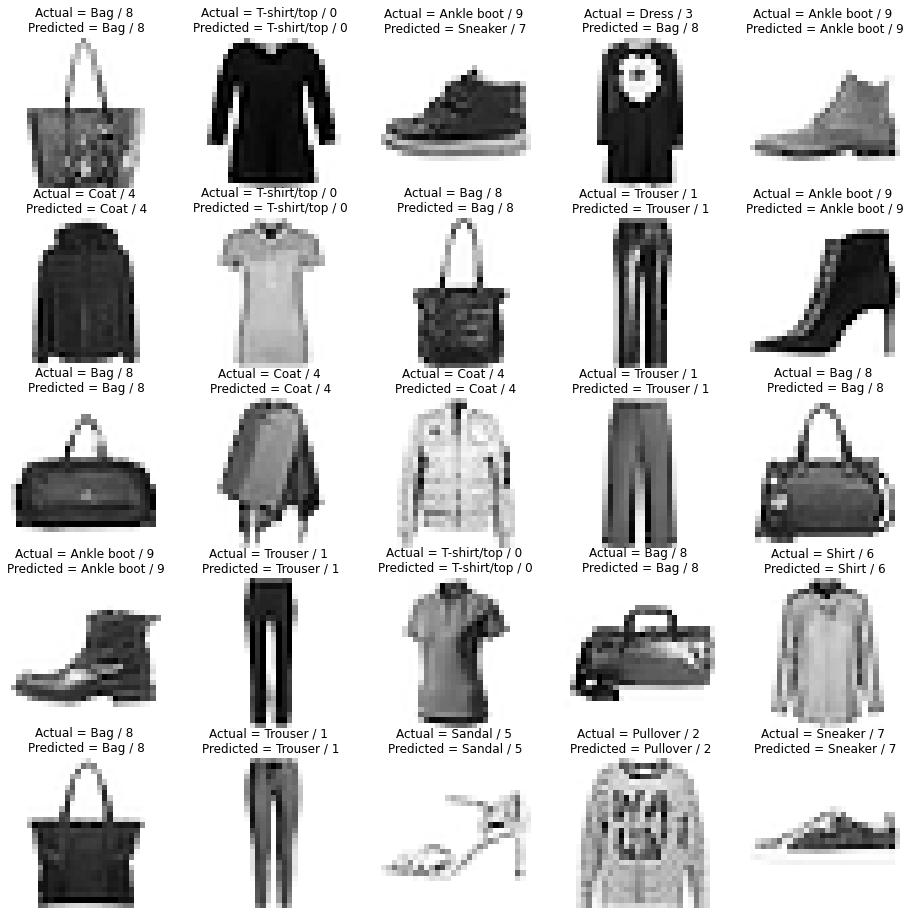

In [ ]:
plt.figure(figsize=(16,16))#fixed eaxh image size to 16x16 pixels
 
j=1
for i in np.random.randint(0, 1000,25):#randomly we need 25 images
  plt.subplot(5,5, j); j+=1 #we hv 5 images in one row and five in once column
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys') #greys means black nd white image
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')#remove the axis

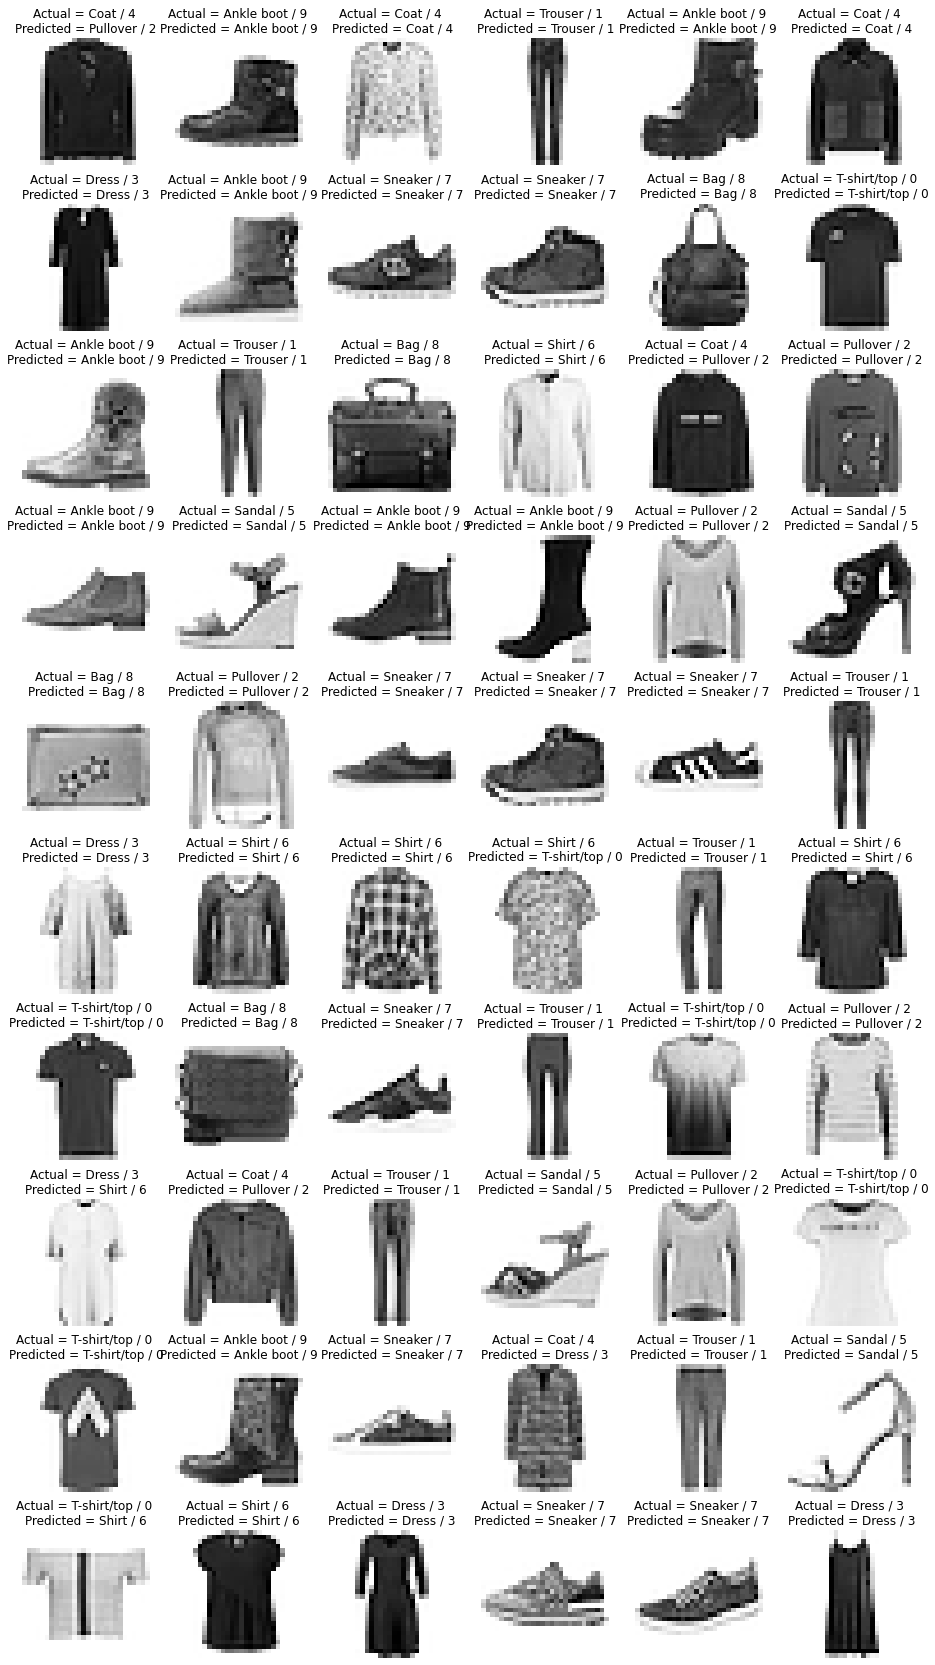

In [ ]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [ ]:
model.save('fashion_mnist_cnn_model.h5')

In [ ]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model2.save('fashion_mnist_cnn_model2.h5')
 
"""######## very complex model"""
 
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model3.save('fashion_mnist_cnn_model3.h5')
 
cnn_model3.evaluate(X_test, y_test)

Epoch 1/20
94/94 [==============================] - 3s 13ms/step - loss: 1.0354 - accuracy: 0.6103 - val_loss: 0.5796 - val_accuracy: 0.7731
Epoch 2/20
94/94 [==============================] - 1s 9ms/step - loss: 0.5596 - accuracy: 0.7893 - val_loss: 0.4778 - val_accuracy: 0.8215
Epoch 3/20
94/94 [==============================] - 1s 10ms/step - loss: 0.4772 - accuracy: 0.8228 - val_loss: 0.4140 - val_accuracy: 0.8462
Epoch 4/20
94/94 [==============================] - 1s 10ms/step - loss: 0.4207 - accuracy: 0.8464 - val_loss: 0.3853 - val_accuracy: 0.8583
Epoch 5/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3838 - accuracy: 0.8596 - val_loss: 0.3609 - val_accuracy: 0.8626
Epoch 6/20
94/94 [==============================] - 1s 10ms/step - loss: 0.3570 - accuracy: 0.8697 - val_loss: 0.3433 - val_accuracy: 0.8702
Epoch 7/20
94/94 [==============================] - 1s 11ms/step - loss: 0.3366 - accuracy: 0.8755 - val_loss: 0.3304 - val_accuracy: 0.8763
Epoch 8/20
94/9

[0.4680904746055603, 0.9016000032424927]